In [1]:
import numpy as np
import matplotlib.pyplot as plt

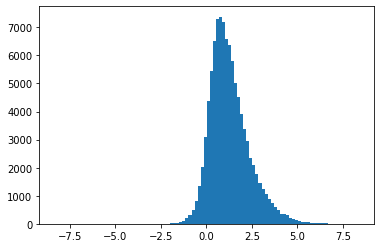

In [10]:
dist = np.load("6d5f7a268a45ac832b73a1dea77a5412ae6442db74357d3df042f1a939fbbe61_work_distribution.npy")

plt.hist(dist, bins = 100)

plt.show()

In [11]:
def MFT_check(dist, target_work, upper_limit = 12, lower_limit = -12, number_of_bins = 50):
    # 1. define the positive and negative distribution
    positive_dist = dist[dist >= 0]
    negative_dist = dist[dist < 0]
    
    # 2. define the bins for positive and negative dist
    t_range = np.linspace(lower_limit, upper_limit, 200)
    p_range = np.linspace(0, upper_limit, number_of_bins)
    n_range = np.linspace(lower_limit, 0, number_of_bins)
    
    # 3. find the bins and counts for the +ve and -ve dist
    positive_counts, positive_bins = np.histogram(positive_dist, bins = p_range)
    negative_counts, negative_bins = np.histogram(negative_dist, bins = n_range)
    
    # 4. find the counts for the target work you want to compare
    p_target_bin_index = np.where(p_range >= target_work)[0][0]
    n_target_bin_index = np.where(n_range <= -target_work)[0][-1]
    p_target_bin_value = positive_bins[p_target_bin_index]
    n_target_bin_value = negative_bins[n_target_bin_index]
    p_target_count = positive_counts[p_target_bin_index]
    n_target_count = negative_counts[n_target_bin_index]
    
    print(f"the number of count in the bin value {p_target_bin_value}: {p_target_count}")
    print(f"the number of count in the bin value {n_target_bin_value}: {n_target_count}")

    # 5. find the probability of p(+W) and p(-W) * exp(W)
    
    total_number = len(dist)
    prob_p_W = p_target_count / total_number
    prob_n_W = n_target_count / total_number
    LHS = prob_p_W
    RHS = prob_n_W * np.exp(target_work)
    print(f"work = {target_work}")
    print(f"LHS [p(+W)] = {LHS}")
    print(f"RHS [p(-W) * exp(W)] = {RHS}")
    print("-" * 20)
    return (LHS, RHS)

In [12]:
for x in np.random.uniform(0, 12, 10):
    MFT_check(dist, x, number_of_bins = 50)

the number of count in the bin value 5.877551020408163: 46
the number of count in the bin value -5.877551020408164: 0
work = 5.7173943851194124
LHS [p(+W)] = 0.00046
RHS [p(-W) * exp(W)] = 0.0
--------------------
the number of count in the bin value 0.4897959183673469: 10654
the number of count in the bin value -0.4897959183673475: 2195
work = 0.29196836598717857
LHS [p(+W)] = 0.10654
RHS [p(-W) * exp(W)] = 0.029392381423504907
--------------------
the number of count in the bin value 1.9591836734693877: 5127
the number of count in the bin value -1.9591836734693882: 30
work = 1.956186471789502
LHS [p(+W)] = 0.05127
RHS [p(-W) * exp(W)] = 0.002121691541491976
--------------------
the number of count in the bin value 4.8979591836734695: 190
the number of count in the bin value -4.8979591836734695: 0
work = 4.762552345879605
LHS [p(+W)] = 0.0019
RHS [p(-W) * exp(W)] = 0.0
--------------------
the number of count in the bin value 8.816326530612244: 0
the number of count in the bin value -